In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [217]:
df = pd.read_csv('cardio_train.csv.zip', sep = ';', index_col = 'id')

# Create extra variables that can improve visuals
df['age_years'] = df['age']/365.25
df['weight'] = df['weight'].astype(int)
df['BMI'] = df['weight']/((df['height']/100)**2)

# Clean Data to get rid of unrealistic values as well as outliers
df = df[(df["ap_hi"] >= 70) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50 ) & (df["ap_lo"] <= 160)]
df = df[(df['BMI']<40) & (df['age_years'] > 35)]
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
id,,,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,1,0,0,1,0,50.357290,21.967120
1,20228,1,156,85,140,90,3,1,0,0,1,1,55.381246,34.927679
2,18857,1,165,64,130,70,3,1,0,0,0,1,51.627652,23.507805
3,17623,2,169,82,150,100,1,1,0,0,1,1,48.249144,28.710479
4,17474,1,156,56,100,60,1,1,0,0,0,0,47.841205,23.011177


In [218]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000,66878.000000
mean,19456.054039,1.354347,164.566733,73.111531,126.265154,81.210592,1.357397,1.221059,0.088968,0.053515,0.804136,0.489548,53.267773,27.007324
std,2469.474128,0.478318,7.811638,12.806905,16.401470,9.438150,0.673211,0.566969,0.284700,0.225060,0.396867,0.499894,6.761052,4.462611
min,14275.000000,1.000000,120.000000,11.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.082820,3.471784
25%,17644.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.306639,23.828125
50%,19696.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.924709,26.196187
75%,21319.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.368241,29.752744
max,23713.000000,2.000000,250.000000,135.000000,200.000000,160.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.922656,39.965649


In [219]:
# Clean Data to get rid of unrealistic values as well as outliers
df = df[(df["ap_hi"] >= 70) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50 ) & (df["ap_lo"] <= 160)]
df = df[(df['BMI']<40) & (df['age_years'] > 35)]

In [220]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
age,1.000000,-0.021066,-0.082008,0.056554,0.211040,0.154514,0.154004,0.099199,-0.046449,-0.028560,-0.009682,0.240822,1.000000,0.110259
gender,-0.021066,1.000000,0.518242,0.207218,0.069192,0.074887,-0.031558,-0.018563,0.339255,0.172487,0.005166,0.011862,-0.021066,-0.086920
height,-0.082008,0.518242,1.000000,0.385777,0.026825,0.044683,-0.049719,-0.018662,0.194617,0.099337,-0.011042,-0.005919,-0.082008,-0.171230
weight,0.056554,0.207218,0.385777,1.000000,0.254502,0.240608,0.129692,0.093398,0.082604,0.074288,-0.015857,0.174604,0.056554,0.838467
ap_hi,0.211040,0.069192,0.026825,0.254502,1.000000,0.699306,0.191159,0.088061,0.030141,0.031750,0.000373,0.427401,0.211040,0.256334
ap_lo,0.154514,0.074887,0.044683,0.240608,0.699306,1.000000,0.156677,0.071774,0.028130,0.040634,0.001052,0.336934,0.154514,0.231088
cholesterol,0.154004,-0.031558,-0.049719,0.129692,0.191159,0.156677,1.000000,0.450409,0.011350,0.035220,0.010048,0.220551,0.154004,0.166585
gluc,0.099199,-0.018563,-0.018662,0.093398,0.088061,0.071774,0.450409,1.000000,-0.006142,0.008534,-0.006934,0.089188,0.099199,0.110048
smoke,-0.046449,0.339255,0.194617,0.082604,0.030141,0.028130,0.011350,-0.006142,1.000000,0.344584,0.025196,-0.015530,-0.046449,-0.027273
alco,-0.028560,0.172487,0.099337,0.074288,0.031750,0.040634,0.035220,0.008534,0.344584,1.000000,0.025613,-0.008917,-0.028560,0.019866


In [221]:
def chol_barplot():
    """
    Creates a barplot showing disease status between separate cholesterol levels
    """
    chol_level = df.groupby(['cholesterol', 'cardio']).size().unstack()
    
    x = np.arange(len(chol_level.index))  # Cholesterol levels
    bar_width = 0.35
    
    plt.figure(figsize = (10,6))
    plt.bar(x - bar_width / 2 , chol_level[0], width=bar_width, label='No Disease', color='blue')
    plt.bar(x + bar_width / 2, chol_level[1], width=bar_width, label='Disease', color='red')

    plt.yscale("log")
    plt.xlabel("Cholesterol Level")
    plt.ylabel("Log(Number of People)")
    plt.title("Cardiovascular Disease Cases by Cholesterol Level")
    plt.xticks(ticks=x, labels=['Normal', 'Above Normal', 'Well Above Normal'])

    plt.legend(title="Cardiovascular Disease Status")

    plt.show()

    return

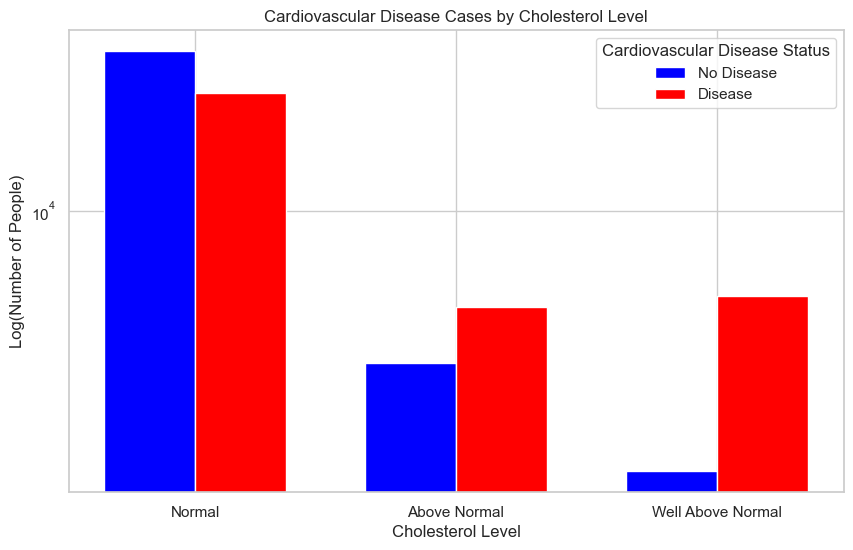

In [222]:
chol_barplot()

In [223]:
# Displaying of the different moments
print(df['ap_hi'].mean())
print(df['ap_hi'].median())
print(df['ap_hi'].std())
print(ss.skew(df['ap_hi']))
print(ss.kurtosis(df['ap_hi']))

126.26515446036066
120.0
16.401470186891967
0.8168005647550539
1.3367822544605081


In [224]:
def scatter_age_bp():
    """"
    Creates a scatter plot between age and systolic blood pressure with disease statsus
    """
    plt.figure(figsize=(20, 10))
    
    plt.scatter(df[df['cardio'] == 0]['age_years'], df[df['cardio'] == 0]['ap_hi'], 
                color="blue", label="No Disease")
    plt.scatter(df[df['cardio'] == 1]['age_years'], df[df['cardio'] == 1]['ap_hi'], 
                color="red", label="Disease")
    
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel('Age in Years', fontsize = 18, labelpad = 20)
    plt.ylabel('Systolic Blood Pressure', fontsize = 18, labelpad = 20)
    plt.title('Age vs Blood pressure as an indicator of Cardiovascular Disease', fontsize = 24, pad = 20)
    
    plt.legend(['No Disease', 'Disease'], loc='lower right', framealpha = 0.5, fontsize = 12)
 

    return

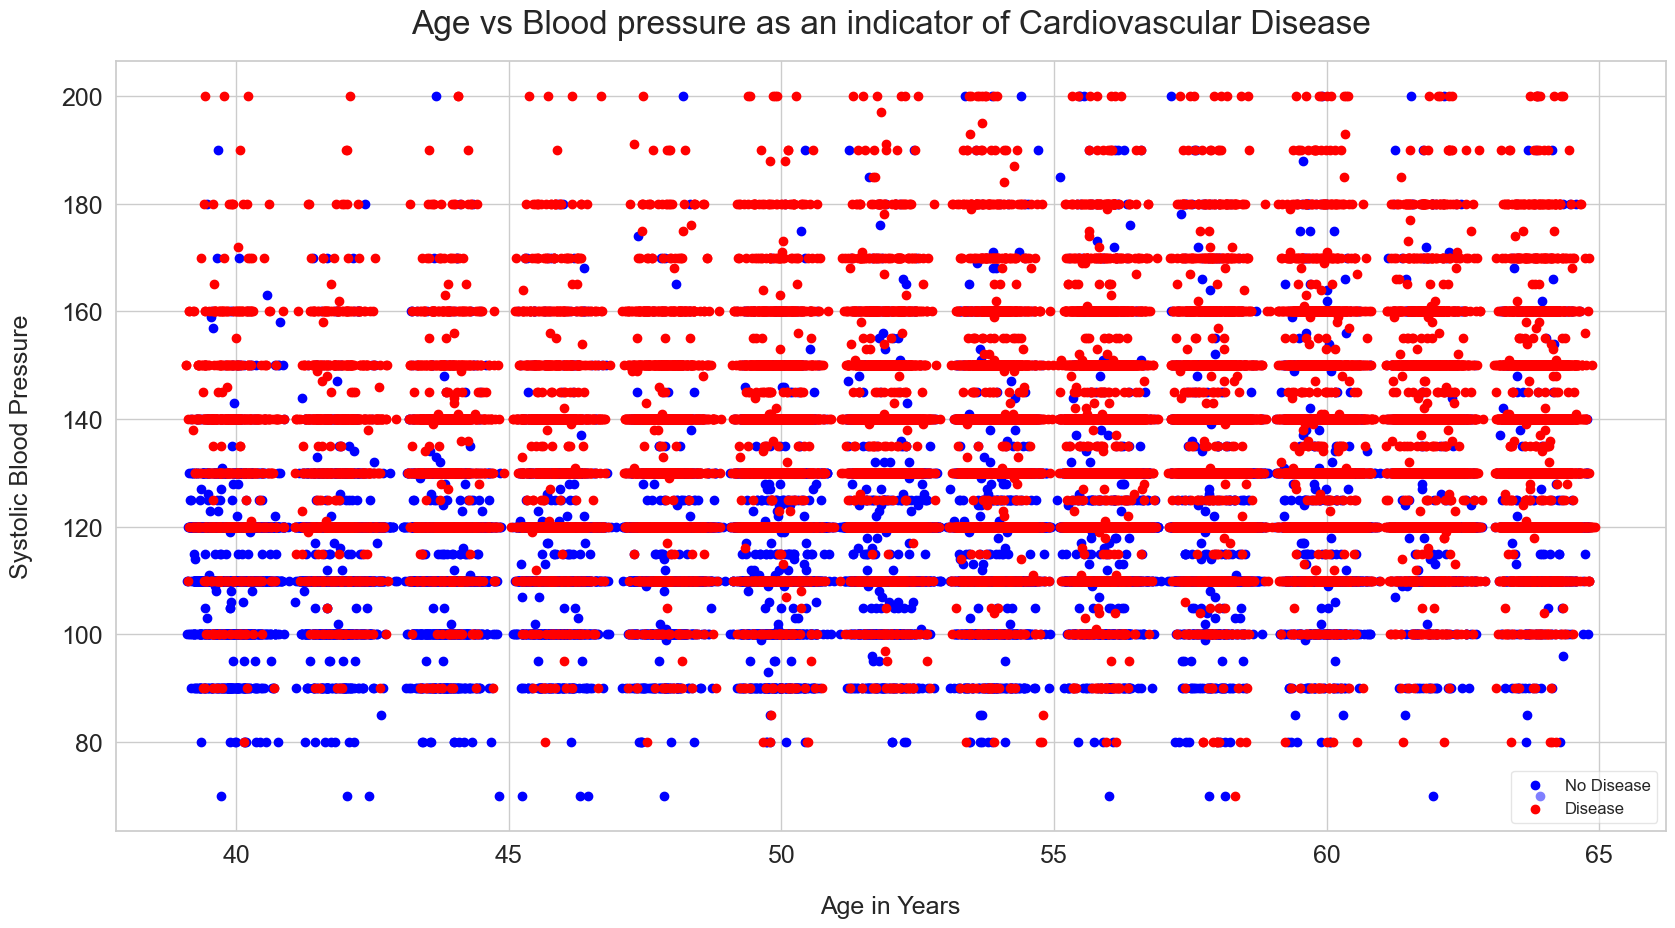

In [225]:
scatter_age_bp()

In [226]:
cholesterol_disease_counts = df.groupby(['cholesterol', 'cardio']).size().unstack(fill_value=0)
cholesterol_disease_counts.columns = ['No Disease', 'Disease']
print(cholesterol_disease_counts)

             No Disease  Disease
cholesterol                     
1                 28692    21759
2                  3655     5297
3                  1791     5684


In [227]:
mean_ap_hi = df.groupby('cardio')['ap_hi'].mean()

mean_ap_hi.index = ['No Disease', 'Disease']

print(mean_ap_hi)

No Disease    119.400228
Disease       133.423213
Name: ap_hi, dtype: float64


In [228]:
def boxplot_factors():
    """
    Boxplot showing blood pressure grouped by disease and cholesterol level
    """
    
    disease_color = 'lightblue'   
    no_disease_color = 'lightcoral'
    median_color = 'green'
    
    df['chol_disease'] = df['cholesterol'].map({1: 'Average', 2: 'Above Average', 3: 'Well Above Average'}) + \
                     ' - ' + df['cardio'].map({0: 'No Disease', 1: 'Disease'})

    category_order = [
    'Average - No Disease', 'Average - Disease',
    'Above Average - No Disease', 'Above Average - Disease',
    'Well Above Average - No Disease', 'Well Above Average - Disease']
    
    custom_labels = ['Avg - ND', 'Avg - D', 'A Avg - ND', 'A Avg - D', 'WA Avg - ND', 'WA Avg - D']
    
    
    data = [df[df['chol_disease'] == group]['ap_hi'] for group in category_order]
    
    plt.figure(figsize=(12, 6))
    box = plt.boxplot(data, labels=category_order, patch_artist=True)
    
    for patch, label in zip(box['boxes'], category_order):
        if " No Disease" in label:
            patch.set_facecolor(disease_color)
        else:
            patch.set_facecolor(no_disease_color)
            
    for median in box['medians']:
        median.set_color(median_color)
        median.set_linewidth(2) 
            
    plt.xlabel('Cholesterol Level and Disease Status')
    plt.ylabel('Systolic Blood Pressure')
    plt.title('Boxplot of Key Factors', fontsize = 16, pad = 20)
    plt.xticks(range(1, len(custom_labels) + 1), custom_labels, rotation=45)

    plt.show()
    
    return

    
    
    

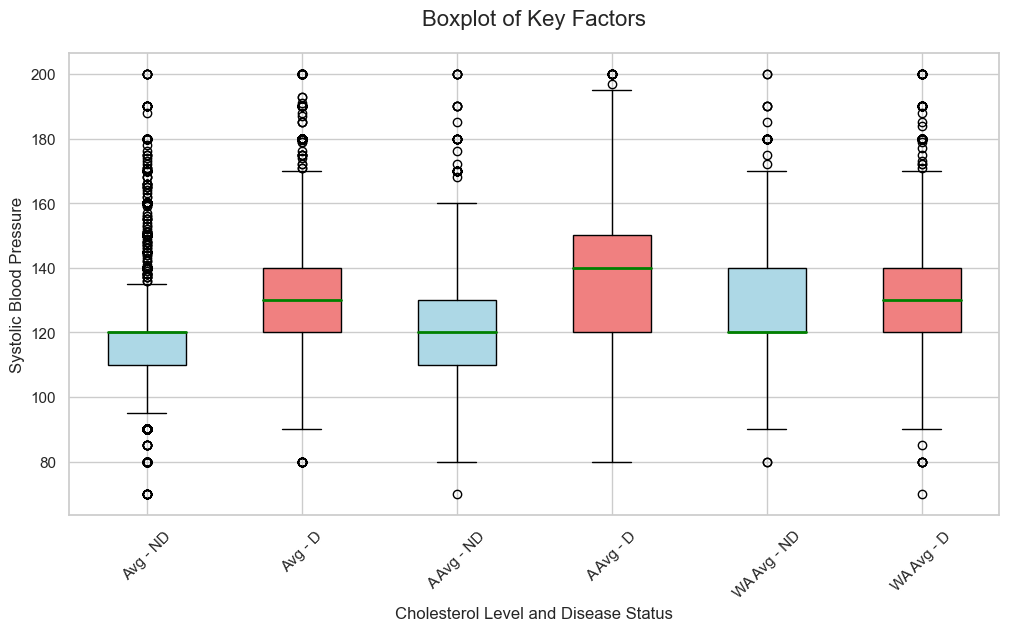

In [229]:
boxplot_factors()

In [230]:
mean_ap_hi = df.groupby(['cholesterol', 'cardio'])['ap_hi'].mean()
mean_ap_hi_df = mean_ap_hi.unstack(level=-1)
mean_ap_hi_df.columns = ['No Disease', 'Disease']  # Rename columns for clarity
mean_ap_hi_df.index = ['Average', 'Above Average', 'Well Above Average']  # Rename rows for clarity

print(mean_ap_hi_df)

                    No Disease     Disease
Average             118.701171  132.162553
Above Average       120.639398  136.990561
Well Above Average  128.070352  134.924701
